In [11]:
import warnings
warnings.filterwarnings("ignore")
from trainer import load_and_preprocess_data
from tool import utils as ul
from tool import config as cfg
import pandas as pd
import pickle
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import numpy as np
import xgboost as xgb
import matplotlib.pyplot as plt


In [ ]:
# deepsub
model = load_model("./model/deepsub.h5",custom_objects={"Attention": Attention},compile=False)
predicted = model.predict(X.reshape(-1,1,1280))
predicted_labels = np.argmax(predicted, axis=1)
label_map = {0: 1, 1: 2, 2: 3, 3: 4, 4: 5, 5: 6, 6: 7, 7: 8, 8: 10, 9: 12}
y_test_transformed = [label_map[x] for x in predicted_labels]
result["DeepSub_Predict"] = y_test_transformed

In [ ]:
# Load model
model_location = "./model/QUEEN_MLPmodel_final.pkl"
with open(model_location, "rb") as f:
  QUEEN_model = pickle.load(f)
  
# Queen pred
y_test = QUEEN_model.predict(np.array(test.iloc[:,3:]))
inv_map = {0: 1, 1: 2, 2: 3, 3: 4, 4: 5, 5: 6, 6: 7, 7: 8, 8: 10, 9: 12, 10: 14, 11: 24}

y_test_transformed = np.array([inv_map[x] for x in y_test])
print("These are the predicted labels:")
print(y_test_transformed)

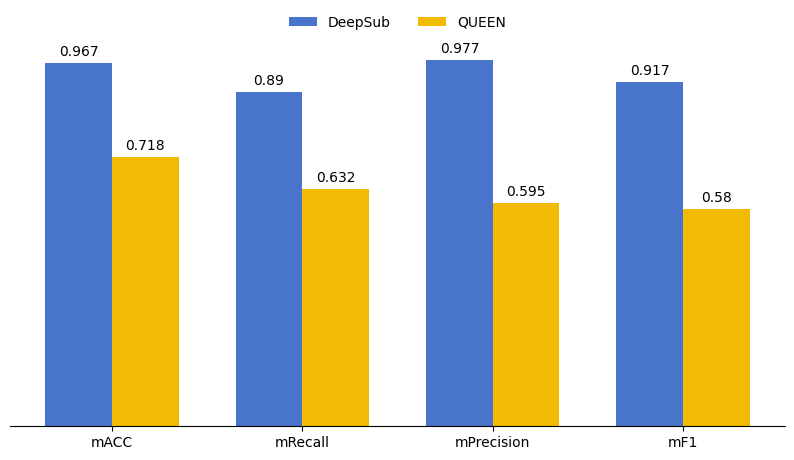

In [58]:
metrics = ['mACC', 'mRecall', 'mPrecision', 'mF1']
deepsub_scores = [0.967, 0.89, 0.977, 0.917]
queen_scores = [0.718, 0.632, 0.595, 0.58]

x = np.arange(len(metrics))  
width = 0.35  

deepsub_color = (72/255, 116/255, 203/255)  # Normalized blue color
queen_color = (242/255, 186/255, 2/255)     # Normalized orange color

fig, ax = plt.subplots(figsize=(10,5))
rects1 = ax.bar(x - width/2, deepsub_scores, width, label='DeepSub', color=deepsub_color)
rects2 = ax.bar(x + width/2, queen_scores, width, label='QUEEN', color=queen_color)

def add_value_labels(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  
                    textcoords="offset points",
                    ha='center', va='bottom')

add_value_labels(rects1)
add_value_labels(rects2)

ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.legend(loc='upper center',frameon=False, bbox_to_anchor=(0.5, 1.1), ncol=len(metrics))
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.yaxis.set_ticks([])
plt.show()
